# mco3_Avellaneda_Fadrigo_Sibal_Tan

[Github](https://github.com/MraccraM/MCO3-MachineLearning)

## Overview

This project aims to implement and compare the performance of two machine-learning(ML) models for a classification task of detecting a song's genre based on several unique song attributes. An dataset of 30,000 songs collected with the Spotify API was chosen and used on the two models. A deeper understanding of the ML model in the context of the dataset is required.

# Quick Navigation
1. [Dataset](#dataset)
2. [Preprocessing](#preprocessing)
3. [Definition of Classification Task](#definition-of-classification-task)
4. [Machine Learning Model Implementation](#machine-learning-model-implementation)
5. [Model Evaluation and Comparison](#model-evaluation-and-comparison)
6. [Conclusion](#conclusion)

## Dataset

<a id="dataset_info"></a>
This [dataset](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs), entitled "30000 Spotify Songs" was uploaded by [Joakin Arvidsson](https://www.kaggle.com/joebeachcapital) on [Kaggle](https://www.kaggle.com/). Additionally the dataset was locally downloaded and can be found in "/Spotify Dataset".

The dataset contains about 30,000 songs of varying genres from the Spotify API using the [spotifyr](https://www.rcharlie.com/spotifyr/) package. It contains information like the unique track ID, release date, genre, etc. 

The dataset has 23 columns:


<table border="1" cellpadding="10">
        <thead>
            <tr>
                <th>Column Number</th>
                <th>Variable Name</th>
                <th>Data Type</th>
                <th>Description</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>1.</td>
                <td>track_id</td>
                <td>character</td>
                <td>Song unique ID</td>
            </tr>
            <tr>
                <td>2.</td>
                <td>track_name</td>
                <td>character</td>
                <td>Song name</td>
            </tr>
            <tr>
                <td>3.</td>
                <td>track_artist</td>
                <td>character</td>
                <td>Song artist</td>
            </tr>
            <tr>
                <td>4.</td>
                <td>track_popularity</td>
                <td>double</td>
                <td>Song popularity where higher is better</td>
            </tr>
            <tr>
                <td>5.</td>
                <td>track_album_id</td>
                <td>character</td>
                <td>Album unique ID</td>
            </tr>
            <tr>
                <td>6.</td>
                <td>track_album_name</td>
                <td>character</td>
                <td>Song album name</td>
            </tr>
            <tr>
                <td>7.</td>
                <td>track_album_release_date</td>
                <td>character</td>
                <td>Date when album released</td>
            </tr>
            <tr>
                <td>8.</td>
                <td>playlist_name</td>
                <td>character</td>
                <td>Name of playlist</td>
            </tr>
            <tr>
                <td>9.</td>
                <td>playlist_id</td>
                <td>character</td>
                <td>Playlist ID</td>
            </tr>
            <tr>
                <td>10.</td>
                <td>playlist_genre</td>
                <td>character</td>
                <td>Playlist genre</td>
            </tr>
            <tr>
                <td>11.</td>
                <td>playlist_subgenre</td>
                <td>character</td>
                <td>Playlist subgenre</td>
            </tr>
            <tr>
                <td>12.</td>
                <td>danceability</td>
                <td>double</td>
                <td>Describes how suitable a track is for dancing based on different factors like tempo, rhythm stability, etc. 0.0 denotes least danceable and 1.0 denotes most danceable.</td>
            </tr>
            <tr>
                <td>13.</td>
                <td>energy</td>
                <td>double</td>
                <td>Measured from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.</td>
            </tr>
            <tr>
                <td>14.</td>
                <td>key</td>
                <td>double</td>
                <td>The estimated overall key of the track.</td>
            </tr>
            <tr>
                <td>15.</td>
                <td>loudness</td>
                <td>double</td>
                <td>The overall loudness of a track in decibels (dB). Typically ranges from -60 to 0 dB.</td>
            </tr>
            <tr>
                <td>16.</td>
                <td>mode</td>
                <td>double</td>
                <td>Mode indicates the modality (major or minor) of a track. 1 represents Major and 0 represents Minor.</td>
            </tr>
            <tr>
                <td>17.</td>
                <td>speechiness</td>
                <td>double</td>
                <td>Detects the presence of spoken words in a track. Values close to 1.0 likely indicate a talk show or podcast. Values above 0.66 mean that tracks are probably made entirely of spoken words. 0.33 to 0.66 means that the track may have both music and speech. Values below 0.33 represent music or non-speech tracks.</td>
            </tr>
            <tr>
                <td>18.</td>
                <td>acousticness</td>
                <td>double</td>
                <td>Confidence measure from 0.0 to 1.0 whether the track is acoustic. A higher value means a higher confidence.</td>
            </tr>
            <tr>
                <td>19.</td>
                <td>instrumentalness</td>
                <td>double</td>
                <td>Predicts whether a track contains no vocals. Values above 0.5 intend to represent musical tracks, with the values approaching 1.0 denoting a higher degree of confidence.</td>
            </tr>
            <tr>
                <td>20.</td>
                <td>liveness</td>
                <td>double</td>
                <td>Detects the presence of an audience in the recording. Values above 0.8 indicate that a track is likely recorded live.</td>
            </tr>
            <tr>
                <td>21.</td>
                <td>valence</td>
                <td>double</td>
                <td>Measured from 0.0 to 1.0 describing the musical positiveness conveyed by a track.</td>
            </tr>
            <tr>
                <td>22.</td>
                <td>tempo</td>
                <td>double</td>
                <td>The overall estimated tempo of a track in beats per minute (BPM).</td>
            </tr>
            <tr>
                <td>23.</td>
                <td>duration_ms</td>
                <td>double</td>
                <td>Duration of the song in milliseconds.</td>
            </tr>
        </tbody>
    </table>

### Input Variables

<a id="input_vars"></a>

The input variable chosen for this project are the following:

<table border="1" cellpadding="10">
        <thead>
            <tr>
                <th>Column Number</th>
                <th>Variable Name</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>1.</td>
                <td>danceability</td>
            </tr>
            <tr>
                <td>2.</td>
                <td>energy</td>
            </tr>
            <tr>
                <td>3.</td>
                <td>key</td>
            </tr>
            <tr>
                <td>4.</td>
                <td>loudness</td>
            </tr>
            <tr>
                <td>5.</td>
                <td>mode</td>
            </tr>
            <tr>
                <td>6.</td>
                <td>speechiness</td>
            </tr>
            <tr>
                <td>7.</td>
                <td>acousticness</td>
            </tr>
            <tr>
                <td>8.</td>
                <td>instrumentalness</td>
            </tr>
            <tr>
                <td>9.</td>
                <td>liveness</td>
            </tr>
            <tr>
                <td>10.</td>
                <td>valence</td>
            </tr>
            <tr>
                <td>11.</td>
                <td>tempo</td>
            </tr>
            <tr>
                <td>12.</td>
                <td>duration_ms</td>
            </tr>
        </tbody>
    </table>


These variables were chosen as the input variables as they are numerical characteristics but also characteristics that are relevant in training a model to detect a song genre. The variable `track_popularity` is the only numerical characteristic left out because the researchers decided that popularity is irrelevant in detecting a genre.

>The features being direct characteristics of the songs in the dataset, this led to believe that a ML model can distinguish a song's genre based on these features. However, upon further examination of the genres and features there may be no correlation between the features and the genre of a song. The researchers hypothesis a low accuracy for the ML models. 

___

### Output Variable
The output variable for this project is the **playlist_genre**. 

The model will aim to predict the **genre of the song** based on the **[input variables](#input_vars)**.

___
___
## Preprocessing

Preprocessing is the process of data preparation that is performed on raw data to preapre it for another data processing procedure. Real world data is typically messy and often created by humans for humans to read. This leads to missing or incomplete fields that, while a human would understand, makes it confusing for a machine learning model to interpret. [(source)](https://www.techtarget.com/searchdatamanagement/definition/data-preprocessing)

Preprocessing data before feeding it to a machine learning model can help improve the [following aspects](https://www.kdnuggets.com/2023/02/importance-preprocessing-machine-learning.html#:~:text=Preprocessing%20data%20before%20applying%20it,negatively%20impact%20the%20model's%20performance.) of the model.
- Improved accuracy and robustness of the model.
- Reduce the time and resources required to train the model.
- Helps prevent overfitting.
- Removes irrelevant or redundanct information.
- Improve the interpretability of the model.


In the case of this [dataset](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs), the data preprocessing would involve the following steps.
1. Read and load the dataset to ensure that we are working on the correct dataset.
2. Checking and dropping and NaN (Not a Number) values in dataset.
3. Establishing that input and output data for the models.

___
### Installation of necessary libraries

In [1]:
import sys 

!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install mlxtend
!{sys.executable} -m pip install xgboost

___
### Importing libraries of preprocessing and data visualization

-  `numpy` - adds support for multi-dimensional arrays and matrics, along with mathematical functions
-  `pandas` - for data manipulation and analysis
-  `matplotlib.pyplot` - provides MATLAB-like way of plotting data
-  `sklearn/preprocessing` - provides data preprocessing functions

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
# keep plt inline in ntbk instead of new window
%matplotlib inline

from sklearn import preprocessing

plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%reload_ext autoreload
%autoreload 2

___
### Load the dataset for visualization and preprocessing

Using `pandas`, the researchers are able to view, visualize and explore the dataset in a dataframe without manipulating the original file. 

In [3]:
df = pd.read_csv('../MCO3-MachineLearning/Spotify_Dataset/spotify_songs.csv')

In [4]:
# show general info and check for NULL values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
# view some of the sample data to ensure data integrity
df.head(2)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600


In [6]:
# tabulated description of the numerical values in the dataframe
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


___
### Check and remove rows if there are null cells in the dataset

NaN values are removed or replaced in ML models because there are cases wherein the ML model cannot handle NaN values. NaN values are also typically considered as irrelevant information that brings no benefit to a ML model. Additionally, cleaning the dataset to avoid NaN values could increase the accuracy and efficiency of the model.

In [7]:
# check for NaN values in dataframe
nan_rows = df.isna().any(axis=1)
np.nonzero(nan_rows)

(array([ 8151,  9282,  9283, 19568, 19811], dtype=int64),)

Rows 8151, 9282, 9283, 19568 and 19811 contain NaN values.

In [8]:
# double check that indicated row does indeed contain a NaN value
df.iloc[8151]

track_id                    69gRFGOWY9OMpFJgFol1u0
track_name                                     NaN
track_artist                                   NaN
track_popularity                                 0
track_album_id              717UG2du6utFe7CdmpuUe3
track_album_name                               NaN
track_album_release_date                2012-01-05
playlist_name                              HIP&HOP
playlist_id                 5DyJsJZOpMJh34WvUrQzMV
playlist_genre                                 rap
playlist_subgenre                 southern hip hop
danceability                                 0.714
energy                                       0.821
key                                              6
loudness                                    -7.635
mode                                             1
speechiness                                  0.176
acousticness                                 0.041
instrumentalness                               0.0
liveness                       

Using python pandas, removing these NaN values is as simple as using the [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) function

In [9]:
# remove NaN values from dataframe
df = df.dropna()

In [10]:
# additional layer of checking if NaN values are removed
nan_rows = df.isna().any(axis=1)
np.nonzero(nan_rows)

(array([], dtype=int64),)

It can be seen that that nan_rows list is empty. Indicating that the rows containing a NaN value have been removed from the dataframe.

___
### Obtaining Input and Output data
- Input Data:   The features that the model will use to make predictions
- Output Data:  The target variable that the model aims to predict

The output variable chosen for this model is `playlist_genre`

In [11]:
# create a new dataframe for the output variable
output = df['playlist_genre']
output = output.to_frame()
output.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   playlist_genre  32828 non-null  object
dtypes: object(1)
memory usage: 512.9+ KB


Because the "playlist_genre" is non-numeric. The researchers will map the unique genres and replace the values in the dataframe.

In [12]:
# obtain the unique values in "playlist_genre"
# The values netted by this block of code are all the unique genre classifications in the dataset
genres = output['playlist_genre'].unique()
genres

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [13]:
# mapping each uniqe genre to a number so the ML model will not have trouble processing the information
mapped_genres = {genre : i for i, genre in enumerate(genres)}
mapped_genres

{'pop': 0, 'rap': 1, 'rock': 2, 'latin': 3, 'r&b': 4, 'edm': 5}

In [14]:
# replace the alphanumeric labels in the dataframe with the mapped values
output = output.replace({'playlist_genre':mapped_genres})
output.head()

,playlist_genre
0,0
1,0
2,0
3,0
4,0


.squeeze() removes 1 axes of length from an array

This is done because in some models (like MLPClassifier) expect a 1D array for the output variable. While this doesn't break the model, it does issue a warning.

In [15]:
output = output.squeeze()
output.shape

(32828,)

The input data to be used to predict a songs genre are the quantified characteristics of the music that were listed in the dataset.

In [16]:
# features chosen are the quantifiable characteristics of a song measured in the dataset
features = ['danceability',
            'energy',
            'key',
            'loudness',
            'mode',
            'speechiness',
            'acousticness',
            'instrumentalness',
            'liveness',
            'valence',
            'tempo',
            'duration_ms']

In [17]:
# creating a separate dataframe for just the features
# it will serve as the input data for the model
df_features = df[features]
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      32828 non-null  float64
 1   energy            32828 non-null  float64
 2   key               32828 non-null  int64  
 3   loudness          32828 non-null  float64
 4   mode              32828 non-null  int64  
 5   speechiness       32828 non-null  float64
 6   acousticness      32828 non-null  float64
 7   instrumentalness  32828 non-null  float64
 8   liveness          32828 non-null  float64
 9   valence           32828 non-null  float64
 10  tempo             32828 non-null  float64
 11  duration_ms       32828 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 3.3 MB


In [18]:
# ensure that the shape of the dataframe is suitable for the model/s
df_features.shape

(32828, 12)

___
### Value Normalization

Normalizing values in a machine learning model is important for serveral different reasons. These are the following:
1. **Scale Consistency**: The different features in the dataset may be scaled differently. ML algorithms perform better when the features of the data are of a similar scale.
2. **Convergence Speed**: Gradient-based optimization algorithms, which are commonly used to train machine learnign models, coverge faster when features are normalized.
3. **Improves Model Performance**: Normalizing the values in a dataset can improve model performance in general.
4. **Avoiding Numerical Instabilities**: There are cases wherein numerical instability issues can arise if the features are not normalized. 
5. **Regularization**: Regularization techniques, which are often used to prevent overfitting, assume that the features are on a similar scale.
6. **Interpretability**: Normalizing the features makes it easier to interpret the coefficients of a model.
7. **Handling Different Measurement Units**: In the event that a dataset has different measurement units, normalizing helps to make the features unitless, making them easier to understand for the model.

[MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) is a function present in scikit-learn's preprocessing library. It transforms features by scaling the features to a given range (default of 0-1). The formula run by the function is the following:


>X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
>
>X_scaled = X_std * (max - min) + min
>
>where min, max = feature_range.

MinMaxScaler() does not reduce the effect of outlier, instead linearly scaling down the values to a fixed range. 


In [19]:
# implementaion of MinMaxScaler()
scaler = preprocessing.MinMaxScaler()
x = scaler.fit_transform(df_features)
df_normalized = pd.DataFrame(x, columns=features)
print(df_normalized)

       danceability    energy       key  loudness  mode  speechiness  \
0          0.760936  0.915985  0.545455  0.918090   1.0     0.063508   
1          0.738555  0.814968  1.000000  0.869162   1.0     0.040632   
2          0.686673  0.930988  0.090909  0.901368   0.0     0.080828   
3          0.730417  0.929988  0.636364  0.894118   1.0     0.111111   
4          0.661241  0.832971  0.090909  0.875385   1.0     0.039107   
...             ...       ...       ...       ...   ...          ...   
32823      0.435402  0.921986  0.181818  0.935272   1.0     0.101961   
32824      0.531027  0.785963  0.000000  0.879785   1.0     0.045752   
32825      0.538149  0.820969  0.545455  0.870628   0.0     0.052397   
32826      0.636826  0.887980  0.181818  0.902856   1.0     0.118736   
32827      0.613428  0.883980  0.454545  0.877501   0.0     0.041939   

       acousticness  instrumentalness  liveness   valence     tempo  \
0          0.102616          0.000000  0.065562  0.522704  0.509

Input data has been normalized and is ready to be fed to the model.

---
---
## Definition of Classification Task

The classification task to be performed in this project is to predict the genre of a song based on a set of features available in the dataset. As such, the **output** variable for this project is the song's **genre**. Meanwhile, the features are mentioned **[here](#input_vars)**. Mentioned in the same cell is the reason for choosing those features. In summary, those features were selected because they are quantified characteristics of songs that are present in the dataset and are relevant in determining a song's genre. The researchers believe that the selected features could be used to classify songs by their genre. 


### Rationale

Originally, there were two candidate datasets to be used. [Spotify](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs) and [Android Malware Detection](https://www.kaggle.com/datasets/joebeachcapital/tuandromd). Initially, the researchers had considered using the malware detection dataset as it aligned with our main interest as a group, which is cybersecurity. However, after exploring both datasets more, the researchers had ultimately decided to use the Spotify dataset and to classify the songs by genre. 

-  **Introduction:** Listening to music is a common hobby among the researchers. But while listening to music we like, we have never really given much thought into what exactly makes certain songs or genres very satisfying to listen to. By identifying the characteristics that define a genre, one can learn more about their musical preference and gain deeper appeciation for music.
-  **Objective:** To classify song genres given certain [features](#input_vars).
-  **Personal Considerations:** Given the various features and labels of the dataset, the researchers had a lot of options like the modality or danceability of the songs. However, the reasearchers had decided to classify by genre as it is the most common and well recognized classification of songs. The features listed [here](#input_vars) allowed the researchers to realize that there may be some trends or patterns that exist in the music that allow it to be distnguishale from each genre. Overall, while the malware dataset aligns with the interests of the researchers, the Spotify dataset had peaked the curiosity of the researchers. And taking advantage of the opportunity granted by this project to satiate that curiosity. 

---
---
## Machine Learning Model Implementation

### [XGBoost Classifier](https://xgboost.readthedocs.io/en/stable/python/python_api.html)

#### Description

The Extreme Gradient Boosting (XGBoost) is a type of ML algorithm that applies ensemble learning methods. An ensemble learning method means that the model builds much smaller, simpler models (typically a decision tree) and combines those predictions to make a final prediction. This learning method typically results in a more robust and accurate model. 

The framework that XGBoost uses, as the name implies, is a gradient boosting framework. Gradient boosting frameworks correct the errors of the model in the combined ensemble of smaller models. It works by training new models to predict the difference between the predicted and true values.

XGBoost also has countermeasures against overfitting with its own regualaritzation techniques. This is done by penalizing overly complex models in an attempt to limit the model's overall complexity.

And while not used in this project, XGBoost is also capable of using custom objective functions allowing it to be used in a much wider varieties of use cases.

#### Algorithm

##### Similarity Score and Output Value

The **similarity score** and **output value** are used to create new decision trees for the model.**Residuals**, which are the *difference between the observed and predicted outcome*, are used to build a tree with the similarity score along with a regularization function (**lambda**). This is denoted by the following formulas:

>*Image of Similarity Score Function* [(source)](https://youtu.be/ZVFeW798-2I?si=9Wo5HOHdIWpjzACa)
>
>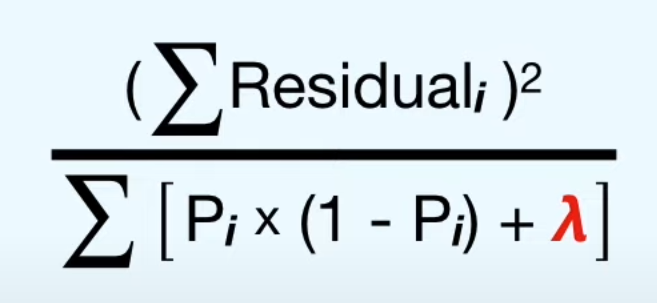

The **similarity score** is used to determine the **gain**.

>*Image of Output Value Function* [(source)](https://youtu.be/ZVFeW798-2I?si=9Wo5HOHdIWpjzACa)
>
>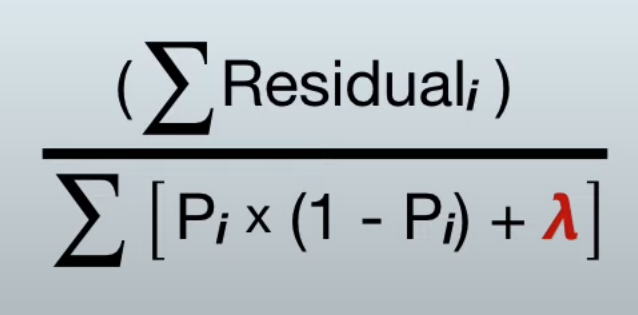

The **output value** is used to determine the probability that will be used to make new decision trees. 

The only difference between the function for similarity score and the output value is the squaring summation of the residuals. 

##### Definition of variables
- **Residuals** - The difference between observed and predicted outcome. The residuals used for the formula depend on the values present in one leaf of the decision tree.
- **Previous Probability** - Probability calculated in the previous decision tree.
- **lambda** - Regularization function that prevents a model from overfitting. Having a **higher** lambda typically results in **lower** similarity scores and gain. If **lambda** = 0, then there is *no regularization*.

#### Gain

desc. This is denoted by the following equation:

>*Image of Gain Formula* [(source)](https://youtu.be/8b1JEDvenQU?si=cVKl4dD2yg2YvzKl)
>
>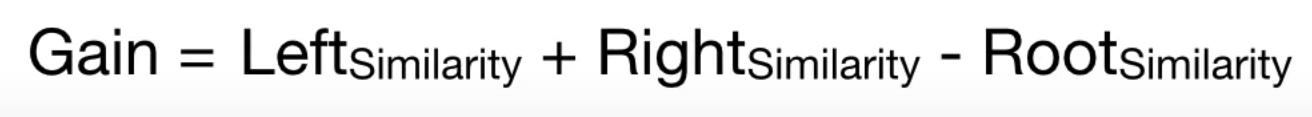

##### Definition of Variables

As a branch of a decision tree is made up of 2 leaves and a root

- **Left(Similarity)** - The similarity score of the leaf on the left
- **Right(Similarity)** - The similarity score of the leaf on the right
- **Root(Similarity)** - The similarity score of the root leaf

A threshold for a branch is determined when the highest gain is found between the leaves. Additionally, the gain is used to determine whether or not a branch will be pruned. This is done by comparing the gain value to a user selected **gamma** value (**y**). If the difference between the gain and gamma is negative, then the branch is pruned; else the branch stays. 

#### Log of the Odds

The Log of the Odds is needed in XGBoost Classification as the prediction that is created from a decision tree is not ready to use. This is denoted by the following equation:

>*Image of Log of the Odds* [(source)](https://www.statisticshowto.com/log-odds/)
>
>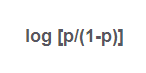

The Log(odds) value is used alongside the output value to of the tree scaled by a **learning rate**(**eta**). The Log(odds) prediction is calculated by the following formula:

> Log(odds)Prediction = Log(Odds) of Original Prediction + (**eta** x Output Value)

##### Definition of Variables 
- **p** - Probability of previous output.

<br>

To convert a Log of the Odds value to a probability, the following equation is needed:

> *Image of Conversion Function from Log of the Odds to Probability* [(source)](https://youtu.be/8b1JEDvenQU?si=XvtPZTPonl2MPe5g)
>
>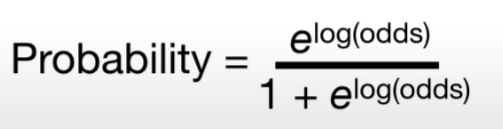

After converting the Log(odds) value back to Probability, it nets the probability of a specific branch. The *new predictions allow for new residuals* and allows for the creation of a new tree based on those parameters. 

#### Cover Value

XGBoost typically has a minimum number of residuals for each leaf defined by a **cover**. This is calculated by using the cover value. This is denoted by the following equation:

>*Image of Cover Function* [(source)]()
>
>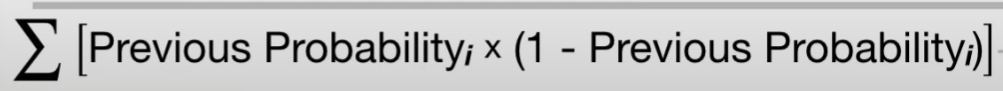

XGBoost has a default minimum cover value of 1. This value is compared to the cover value of the leaf and if the cover value is less than the minimum cover value, the branch is pruned.

### [Multi-Layer Perceptron Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

#### Description

The Multi-layer Perceptron Classifier(MLP) is a neural-network classifier. In general, neural networks consist of three distinct layers and the MLP follows this structure. These are the following:
1. Input Layer
2. Hidden Layer
3. Output Layer

Additionally, neural networks conduct three processes to train a model. These are the following:
1. Forward Propagation
2. Backward Propagation
3. Epoch(s)

>*Visualization of Layers Present in a Neural Network* [(source)](https://medium.com/@AI_with_Kain/understanding-of-multilayer-perceptron-mlp-8f179c4a135f)
>
>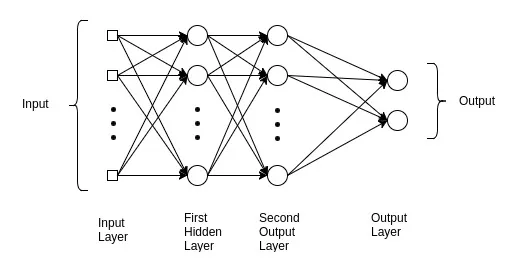

The input layer contains data that is given by the dataset used for the model. 

The hidden layer consists of functions that essentially allow the model to make an educated guess as to what the outcome is. 

The output layer is where the predictions of the model are placed.

#### Algorithm

>*Visualization of NN Perceptron Algorithm*[(source)](https://medium.com/@ayush260201/maths-behind-neural-network-simplified-5f49594def0d)
>
>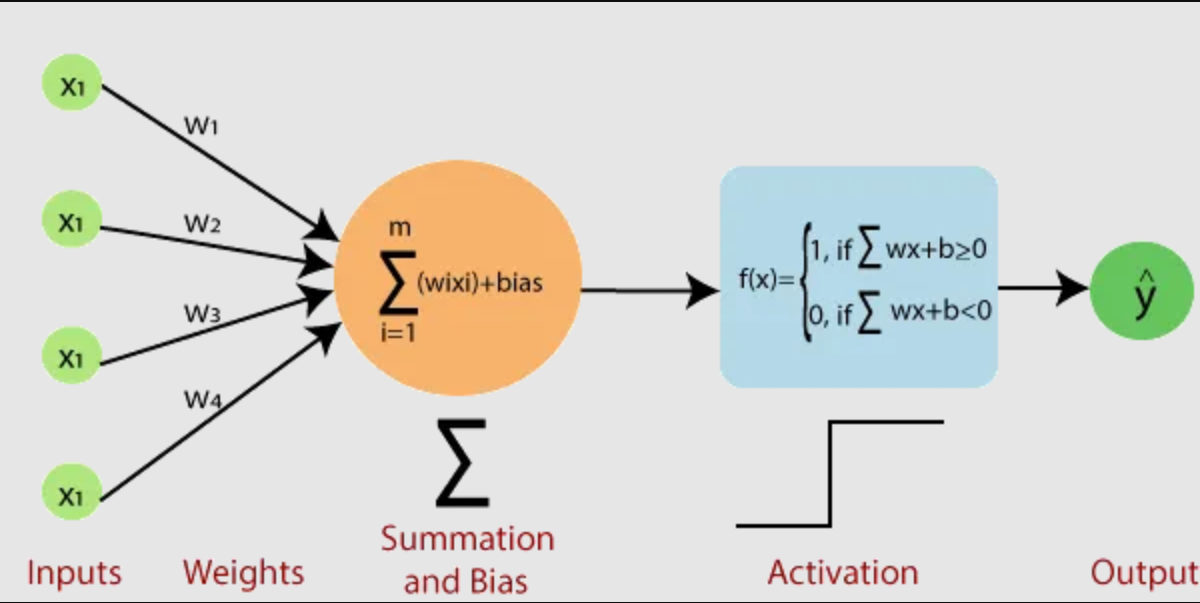

A MLP works in the following manner:

The Input Layer has a value and is connected to the hidden layer via **channels**. Each channel has a specific **weight** assigned to it, and the value is multiplied to the weight of the channel. That value is passed to the hidden layer (specifically a neuron) and added to it is the neuron's **bias**. 

Once in the neuron and the bias is added, the resulting value is passed through an **activation function** that determines whether or not the neuron is activated. If the neuron is activated, then it will pass the value (calculated with the weight and bias similarly to the input layer) to the next neuron in the network. This process is **repeated** until an *output is determined*. This is otherwise known as ***forward propagation***.

Once the output is determined, it will **compare** the *obtained outcome with the expected outcome*. From there it determines the magnitude of the error and passes this information through the neural network backwards. The network will then **adjust** the weights of the channels in order to *minimize the magnitude of the error*. This process is otherwise known as ***backward propagation***. 

The cycle of forward and backward propagation is repeated for a number of times. The amount of times the process is repeated is called an **epoch**. The cycles are repeated until the allocated number of epochs are reached or until the network is able to *minimize the magnitude of error*. 

### Importing ML model Libraries

In [20]:
# library for dataset train/test split
from sklearn.model_selection import train_test_split

# libraries for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from mlxtend.plotting import plot_confusion_matrix

# libraries for ML models
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

### Split the dataset between training and testing

Train test split is 75/25 because we have a relatively large dataset of 30K+ elements and decided to use a common train/test split

[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) - It is a function available in scikit-learn that splits arrays or matrices into random train and test subsets. 

In [21]:
# Split data into training and testing, 75% training and 25% testing. 
# df_normalized - features dataframe (input data)
# output - genres dataframe (output data)
# test_size - size of test split (25%)
features_train, features_test, output_train, output_test = train_test_split(df_normalized, 
                                                                            output, 
                                                                            test_size=0.25)
print(f"Total number of samples: {len(df)}")
print(f"No. of training samples: {len(features_train)}")
print(f"No. of testing samples: {len(features_test)}")

Total number of samples: 32828
No. of training samples: 24621
No. of testing samples: 8207


### XGBoost Classifier

Model Training of **XGBoost Classifier Model**

- objective - Specifies the learning task and the corresponding learning objective function to be used
- random state - Used to set the random seed for reproducability

In [22]:
model_1 = xgb.XGBClassifier(objective="binary:logistic", random_state=45)

print("Model #1: XGBOOST Classifier")
model_1.fit(features_train, output_train)
prediction_1 = model_1.predict(features_test)
acc_1 = accuracy_score(output_test, prediction_1) * 100
print(f"Model accuracy: {acc_1}")

Model #1: XGBOOST Classifier
Model accuracy: 55.91568173510419


### Multi-layer Perceptron Classifier

Model Training of **Multi-layer Perceptron Classifier**

- random_state - Used to set the random seed for reproducability
- max_iter - Set the maximum number of iterations for the model

In [23]:
model_2 = MLPClassifier(random_state = 1, max_iter = 1000)

print("Model #2: Multi-level Perceptron Classifier")
model_2.fit(features_train, output_train)
prediction_2 = model_2.predict(features_test)
acc_2 = accuracy_score(output_test, prediction_2) * 100
print(f"Model accuracy: {acc_2}")

Model #2: Multi-level Perceptron Classifier
Model accuracy: 53.44218350188863


When max_iter is assigned values less than 1000, the model produces a warning saying the following:
>Stochastic Optimizer: Maximum iterations (X) reached and the optimization hasn't converged yet.

This means that the model did not converge during that run. The algorithm optimizes by a stepwise convergence to a minumum and having insufficient iterations means that the minumum is not found.

___
___
## Model Evaluation and Comparison

Evaluation methods used: Accuracy, Confusion Matrix, F1 score


[accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.top_k_accuracy_score.html#sklearn.metrics.top_k_accuracy_score) - This function computes subset accuracy; the set of labels predicted for a sample must exactly match the correspondng set of labels. 

[confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) - This function computes a confusion matrix to evaluate the accuracy of a classification.

[f1_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - This function computes the F1 score of a model. It can be interpreted as a harmonic mean of the precision and recall. The best value of the f1 score would be 1 while the worst is 0. The formulat of F1 scores are represented by the following:

> F1 = 2 * (precision * recall) / (precision + recall)

### Model Testing of **XGBoost Classifier Model**

Model #1: XGBoost Classifier
XGBoost Classifier Model accuracy: 55.91568173510419
f1 score: [37.22 61.01 71.57 45.73 47.57 69.83]


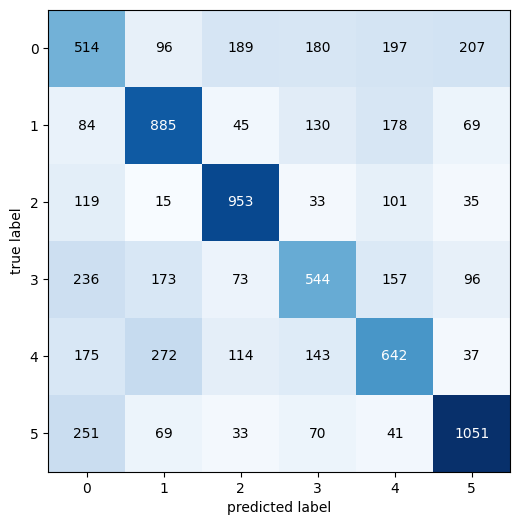

In [24]:
print("Model #1: XGBoost Classifier")
print(f"XGBoost Classifier Model accuracy: {acc_1}")

# f1 score
f1score_1 = f1_score(output_test, prediction_1, average=None)
f1score_1_percent = [x * 100 for x in f1score_1]
f1score_1_percent = np.around(f1score_1_percent,2)
print(f"f1 score: {f1score_1_percent}")

# confusion matrix
cnf_1 = confusion_matrix(output_test, prediction_1)
fig, ax = plot_confusion_matrix(conf_mat=cnf_1)
plt.show()

#### Evaluation of **XGBoost Classifier Model**

-  Each row represents the true label of a song whereas each column represents the predicted label of a song.
-  Findings:
    -  ~480 (~35% f1 score) songs are correctly predicted as Pop
    -  ~930 (~62% f1 score) songs are correctly predicted as Rap
    -  ~930 (71% f1 score) songs are correctly predicted as Rock
    -  ~560 (~47% f1 score) songs are correctly predicted as Latin
    -  ~600 (~45 f1 score) songs are correctly predicted as R&B
    -  ~1050 songs (~69 f1 score) are correctly predicted as EDM
-  Strengths:
    -  Good at classifying Rap, Rock, and EDM.
-  Weaknesses:
    -  Bad at classifying Pop, Latin, and R&B.
-  Overall, the XGBoost Classifier model is good at classifying only Rap, Rock, and EDM by large margins. It struggles in classifying Pop, Latin, and EDM.


##### Accuracy

The XGBoost classifier model was able to achieve an accuracy of >55%. This accuracy was achieved with a runtime of ~3s. The nature of XGBoost allows for fast computations to be made and it is very suitable to be used in larger datasets as it using an ensemble learning method. 

### Model Testing of **Multi-layer Perceptron Classifier**

Model #2: Multi-level Perceptron Classifier
MLP Model accuracy: 53.44218350188863
f1 score: [38.71 59.19 67.25 42.46 44.   66.01]


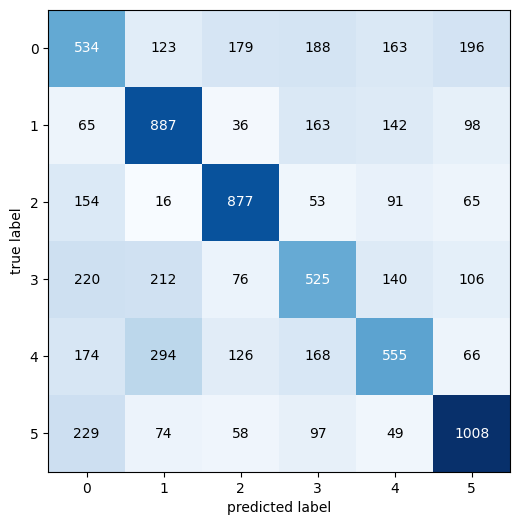

In [25]:
print("Model #2: Multi-level Perceptron Classifier")
print(f"MLP Model accuracy: {acc_2}")

# f1 score
f1score_2 = f1_score(output_test, prediction_2, average=None)
f1score_2_percent = [x * 100 for x in f1score_2]
f1score_2_percent = np.around(f1score_2_percent,2)
print(f"f1 score: {f1score_2_percent}")

# confusion matrix
cnf_2 = confusion_matrix(output_test, prediction_2)
fig, ax = plot_confusion_matrix(conf_mat=cnf_2)
plt.show()

#### Evaluation of **MLP Classifier Model**

-  Each row represents the true label of a song whereas each column represents the predicted label of a song.
-  Findings:
    -  ~440 (~35% f1 score) songs are correctly predicted as Pop
    -  ~900 (~59% f1 score) songs are correctly predicted as Rap
    -  ~900 (~67% f1 score) songs are correctly predicted as Rock
    -  ~460 (~41% f1 score) songs are correctly predicted as Latin
    -  ~600 (~44% f1 score) songs are correctly predicted as R&B
    -  ~1030 songs (~67% f1 score) are correctly predicted as EDM
-  Strengths:
    -  Good at classifying Rap, Rock, and EDM.
-  Weaknesses:
    -  Bad at classifying Pop, Latin, and R&B.
-  Overall, the MLP Classifier model is slightly weaker than the XGBoost Classifier by only a few percentage points (roughly 2-3%). Due to the very marginal difference, the MLP Classifier practically has the same performance as the XGBoost Classifier.


##### Accuracy

The MLP classifier model was able to achieve an accuracy of >52% but <55%. This accuracy was achieved with a runtime of >30s. This model has a comparatively longer runtime as it traverses a neural network twice per iteration for a set number of maximum iterations. The model only stops when maximum accuracy is achieved or the maximum iterations is reached. This makes MLP classifier less suitable to use in larger datasets where it could increase the runtime and resources needed to run the model.

### Comparison of the Two Models

<a id="comparison"></a>

#### **Model Performance Comparison**

##### Confusion Matrix Analysis

In both models, only the genres Rap, Rock, and EDM received individual accuracies greater than 50%. The XGBoost Classifier attained accuracies of 61.64% (912 true positives), 68.47% (871 true positives), and 68.72% (1037 true positives) whereas the MLP Classifier attained accuracies of 59.74% (888 true positives), 65.39% (888 true positives), and 66.54% (1075 true positives) for the gengres Rap, Rock, and EDM respectively. The genres Pop, Latin, and R&B failed to achieve greater than 50% accuracy in both models.

The researchers hypothesize that the Rap, Rock, and EDM genres are most successful because they are the most distinguishable based on the features. Rap is easily recognized by its speechines and fast tempo. Rock is known for its high energy and loudness despite its speechiness and tempo not being as high as rap. EDM is charactterized by little to no speechiness but high danceability, louudness, energy, and tempo.

Pop has the lowest accuracy among all genres in both models. This is likely because Pop is a very diverse genre, which makes it highly likely to overlap with other genres. For instance, "God is a Woman" by Ariana Grande is considered pop song despite its speechiness and danceability being very similar to rap and hip-hop. "... Ready for it?" by Taylor Swift is considered an "electropop" song, which means that it combines EDM and pop elements. In short, Pop is comprised of many variations such that it is very difficult to standardize what Pop exactly sounds like. This same theory can also apply to Latin and R&B wherein there is a lot of variation within the genre itself that makes it troublesome to accuractely classify the song's genre. 

##### Accuracy Comparison

Both models achieved above 50% accuracy. Unfortunately, that is generally considered a bad accuracy for a ML model. 

Between the two models there is a <2% variance between them. This means that the models performed similarly. The results in the confusion matrix and F1 score prove that the 2 models performed similarly with this dataset. 

Adjusting the parameters of the models may net a slight increase in accuracy however, the researchers believe that the features of the dataset may not have a direct correlation to the output variable selected. Ex. having a high danceability does not necessarily mean that the song is classifiable as pop or rock, it is still possible that the song is part of EDM or R&B. This holds true for most of the features, as a lot of the features per genre has a potential overlap with other genres. 

#### **Why is XGBoost faster than MLP?**

The MLP Classifier has a noticably longer execution time compared to the XGBoost Classifier. There are multiple factors that affect the execution time of the model however, in this case the researchers have noted the following:

1. The 2 models function fundamentally differently.
2. The MLP Classifier has to exhaust all the iterations set in the "max_iter" variable. 

The MLP Classifier works by repetitive cycles of forward and backward propagation. This means that in one iteration, the model is travesed twice. This is different compared to XGBoost Classification that builds decision trees and makes a decision based on their collective result.

Additionally, the "max_iter" parameter that is set in the model dictates how many maximum iterations that model exhausts before finishing. The model also prematurely stops when it reaches its maximum accuracy however, in the case of this model it is well over 750 iterations. As such, the execution time is significantly higher because it must reach maximum accuracy or all iterations.

#### **Why did the two models achieve such a low accuracy?**

Mentioned in previous a previous cell, the researchers believe that the models achieved a rather low accuracy because of the relation of the features to the output variable. Despite having [12 different features](#input-variables), reading through what the variables are and looking at the unique genres shows that there is a lot of potential overlap in the features to pertain to a certain genre. 

For example, a song with a high danceability, tempo, and speechiness can pertain to pop, rap and rock songs. A song with low speechiness, mode, and tempo can pertain to a latin or R&B song. The lack of uniqueness each genre has in line with the features available make it hard to identify a genre for a human, much less a machine. Theoretically, both models could achieve higher accuracies if there were significantly more features available to differentiate each genre.